## HW 5 Kamui Morita-Albright 2045744

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/CC_GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
data.duplicated().sum()

0

Since there are a lot of missing values for minimum payments. I fill them with mean values

In [7]:
data.MINIMUM_PAYMENTS = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median())

In [8]:
data.dropna(inplace=True)
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Now the null values are gotten rid of.

In [9]:
data.drop(columns = 'CUST_ID', inplace = True)

Now we create a histogram to see if there are linear trends which can lower the effectiveness of clustering.

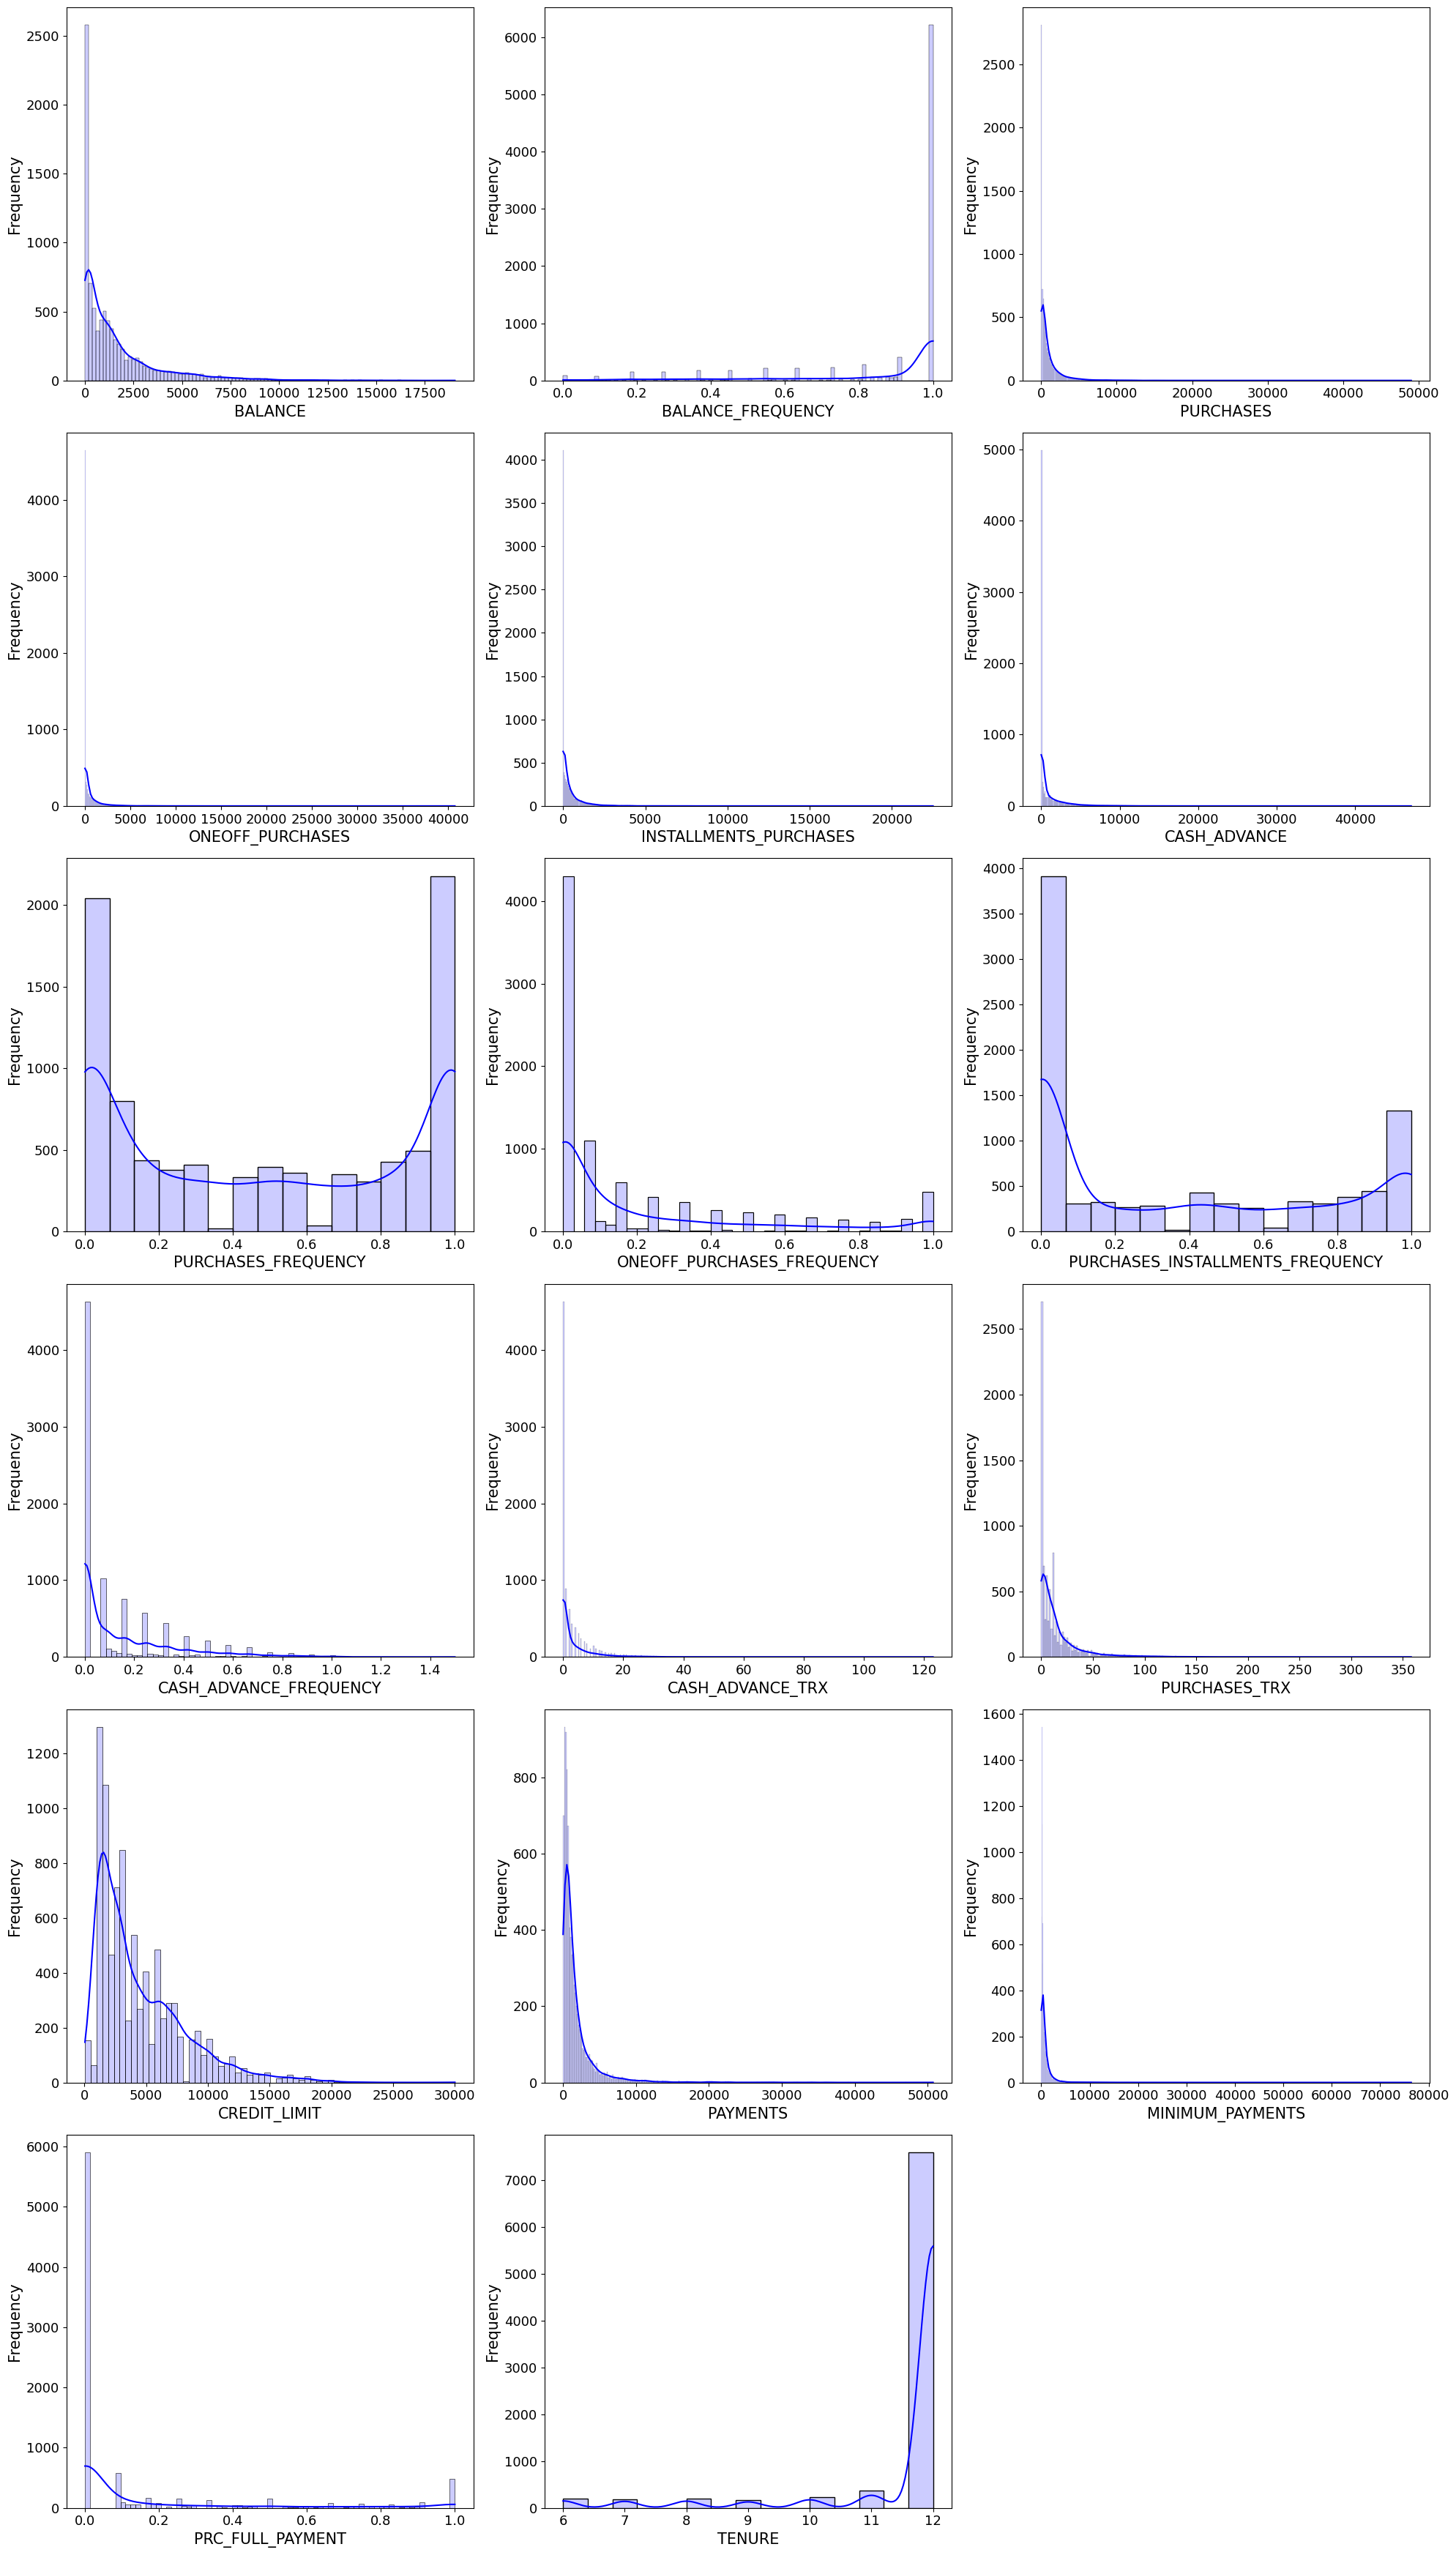

In [10]:
fig = plt.figure(figsize = (20, 35))

for i, col in enumerate(data.columns):
    ax = plt.subplot(6, 3, i+1)
    sns.histplot(data, x = col, ax = ax, color = 'blue', kde = True, alpha = 0.2)
    plt.xlabel(col, fontsize = 15)
    plt.ylabel("Frequency", fontsize = 15)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)

plt.tight_layout()
fig.show()

As we can observe, there seem to be trends in some of the features, but we don't observe any linear trends. So I proceed without handling the data regarding linear trends.

Now, we look for outliers.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'BALANCE'),
  Text(1, 0, 'BALANCE_FREQUENCY'),
  Text(2, 0, 'PURCHASES'),
  Text(3, 0, 'ONEOFF_PURCHASES'),
  Text(4, 0, 'INSTALLMENTS_PURCHASES'),
  Text(5, 0, 'CASH_ADVANCE'),
  Text(6, 0, 'PURCHASES_FREQUENCY'),
  Text(7, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
  Text(8, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
  Text(9, 0, 'CASH_ADVANCE_FREQUENCY'),
  Text(10, 0, 'CASH_ADVANCE_TRX'),
  Text(11, 0, 'PURCHASES_TRX'),
  Text(12, 0, 'CREDIT_LIMIT'),
  Text(13, 0, 'PAYMENTS'),
  Text(14, 0, 'MINIMUM_PAYMENTS'),
  Text(15, 0, 'PRC_FULL_PAYMENT'),
  Text(16, 0, 'TENURE')])

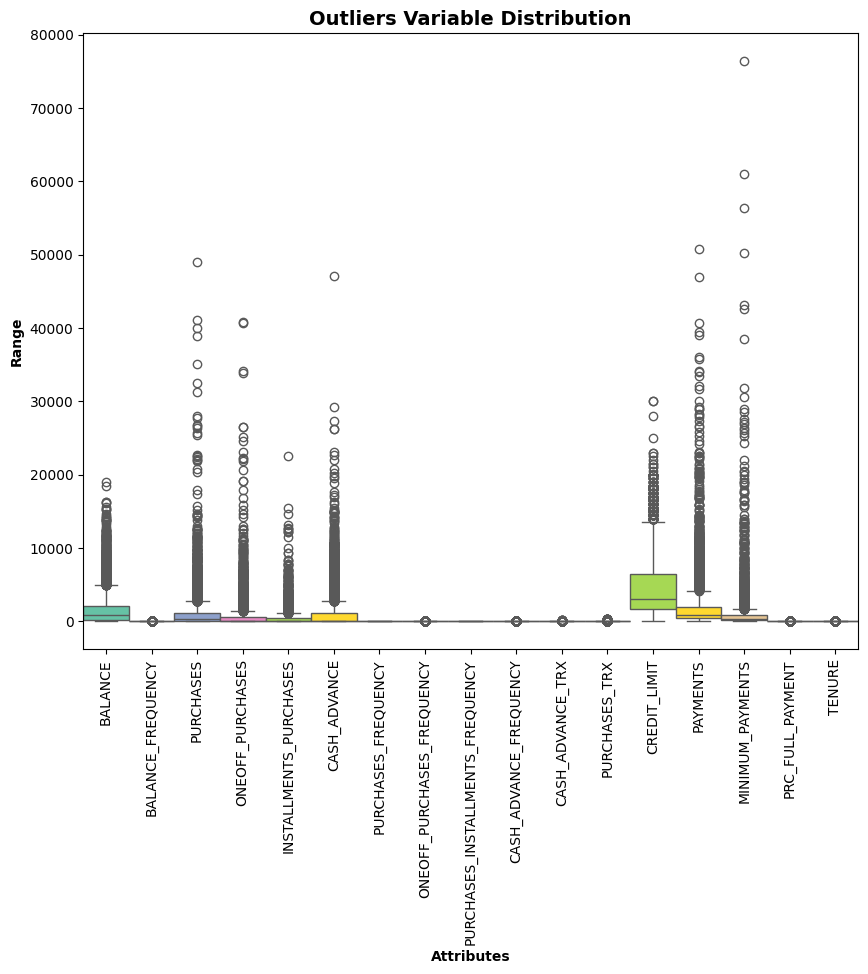

In [11]:
num_attributes = [x for x in data.columns if data[x].dtype in ('float64','int64')]
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = data[num_attributes], orient="v", palette="Set2",saturation=1, width=1)

plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.xticks(rotation=90)

Here, we can observe some outliers in BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS, and MINIMUM_PAYMENTS, which could hinder the clustering performance. So I'm going to get rid of them.

In [ ]:
#balance
Q1 = data.BALANCE.quantile(0.05)
Q3 = data.BALANCE.quantile(0.95)
IQR = Q3 - Q1
data = data[(data.BALANCE >= Q1 - 1.5*IQR) & (data.BALANCE <= Q3 + 1.5*IQR)]

#purchases
Q1 = data.PURCHASES.quantile(0.05)
Q3 = data.PURCHASES.quantile(0.95)
IQR = Q3 - Q1
data = data[(data.PURCHASES >= Q1 - 1.5*IQR) & (data.PURCHASES <= Q3 + 1.5*IQR)]

#oneoff_purchases
Q1 = data.ONEOFF_PURCHASES.quantile(0.05)
Q3 = data.ONEOFF_PURCHASES.quantile(0.95)
IQR = Q3 - Q1
data = data[(data.ONEOFF_PURCHASES >= Q1 - 1.5*IQR) & (data.ONEOFF_PURCHASES <= Q3 + 1.5*IQR)]

#installments_purchases
Q1 = data.INSTALLMENTS_PURCHASES.quantile(0.05)
Q3 = data.INSTALLMENTS_PURCHASES.quantile(0.95)
IQR = Q3 - Q1
data = data[(data.INSTALLMENTS_PURCHASES >= Q1 - 1.5*IQR) & (data.INSTALLMENTS_PURCHASES <= Q3 + 1.5*IQR)]

#cash_advance
Q1 = data.CASH_ADVANCE.quantile(0.05)
Q3 = data.CASH_ADVANCE.quantile(0.95)
IQR = Q3 - Q1
data = data[(data.CASH_ADVANCE >= Q1 - 1.5*IQR) & (data.CASH_ADVANCE <= Q3 + 1.5*IQR)]

#credit_limit
Q1 = data.CREDIT_LIMIT.quantile(0.05)
Q3 = data.CREDIT_LIMIT.quantile(0.95)
IQR = Q3 - Q1
data = data[(data.CREDIT_LIMIT >= Q1 - 1.5*IQR) & (data.CREDIT_LIMIT <= Q3 + 1.5*IQR)]

#payments
Q1 = data.PAYMENTS.quantile(0.05)
Q3 = data.PAYMENTS.quantile(0.95)
IQR = Q3 - Q1
data = data[(data.PAYMENTS >= Q1 - 1.5*IQR) & (data.PAYMENTS <= Q3 + 1.5*IQR)]

#purchases
Q1 = data.MINIMUM_PAYMENTS.quantile(0.05)
Q3 = data.MINIMUM_PAYMENTS.quantile(0.95)
IQR = Q3 - Q1
data = data[(data.MINIMUM_PAYMENTS >= Q1 - 1.5*IQR) & (data.MINIMUM_PAYMENTS <= Q3 + 1.5*IQR)]

Now, we use heatmap to look for too much correlation.

<Axes: >

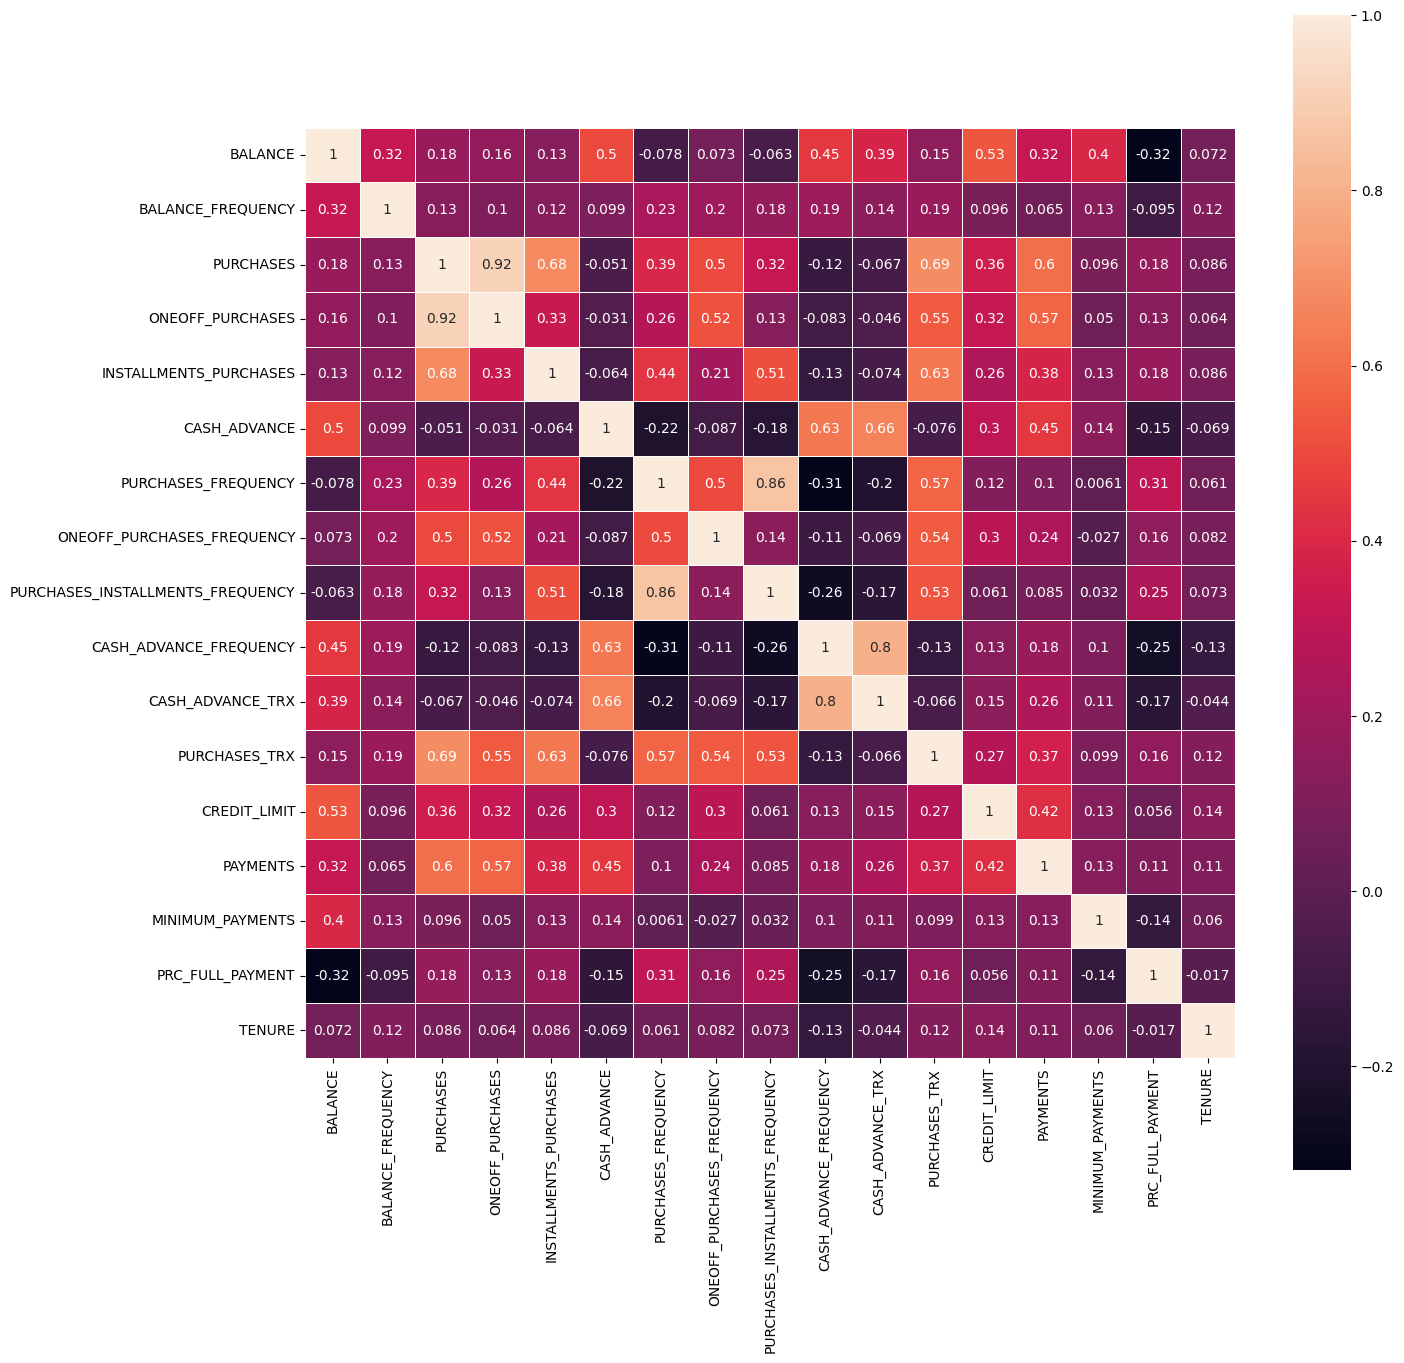

In [12]:
fig = plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), square = True, annot = True, linewidths = 0.5)

We can observe high correlations between some of the features. Purchases and minimum_purchasees especially has a high correlation of over 0.92. This could cause multicillinearity. However, simply dropping some of these features is not a good method for clustering. Thus, I try PCA method on the data to reduce this effect.

In [13]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

Before proceeding to PCA, I will scale the data.

In [15]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)
df_scaled = pd.DataFrame(data = df_scaled, columns = data.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.302425,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.097455,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.093329,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.228336,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.257294,-0.525588,0.360541


In [16]:
pca = PCA()
X_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data = X_pca, columns = [f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.683768,-1.072569,0.477241,0.679146,0.043128,0.069708,0.821503,-0.018192,0.119090,-0.078315,-0.235970,-0.052486,-0.081678,-0.187938,0.149982,0.048263,-0.000161
1,-1.134846,2.508739,0.603529,-0.110176,0.668390,-1.096271,-0.385955,0.176708,0.675834,-0.778006,-0.870632,-0.607216,-0.034566,-0.733211,-0.532871,-0.082865,0.000003
2,0.969060,-0.383487,0.092646,1.236661,-2.166476,-0.332935,-1.540251,-0.230306,-0.868959,-0.001768,-0.762181,0.683761,0.696610,0.042282,0.221696,0.511340,0.000022
3,-0.888426,0.004385,1.501626,1.073536,0.226273,-0.169376,-0.236550,-0.690817,-0.064193,0.393873,0.747575,0.119295,-0.128141,-0.417169,-0.091880,-0.016222,-0.000010
4,-1.600262,-0.684048,0.349759,1.012485,-0.454570,0.076857,0.697247,0.246265,0.578783,-0.122271,-0.455086,-0.108767,-0.037412,-0.041019,0.290902,-0.070578,-0.000081


Now, to find the best number of compones for pca, I will analyze the varience ratio.

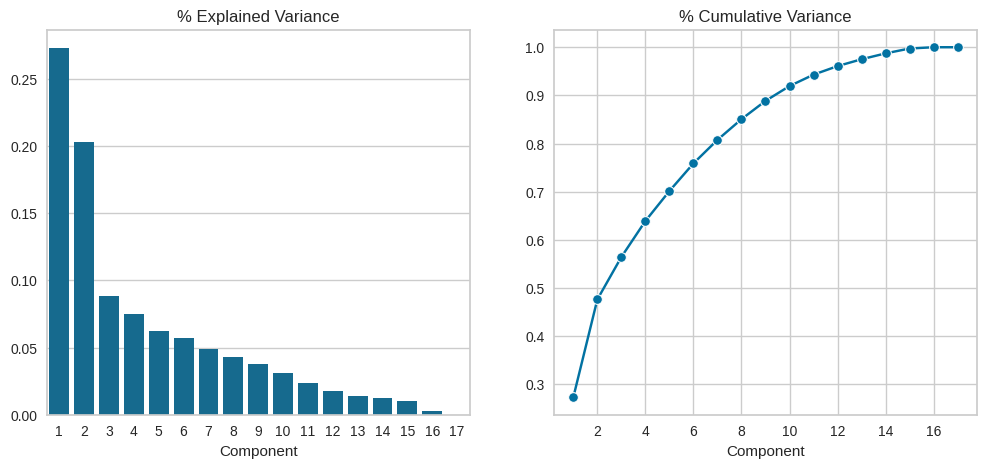

In [17]:
evr = list(pca.explained_variance_ratio_)
evr = sorted(evr, reverse=True)
evr_cum = list(pca.explained_variance_ratio_.cumsum())
num_components = [x + 1 for x in range(X_pca.shape[1])]
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

sns.barplot(x = num_components, y = evr, ax = ax[0])
ax[0].set_xlabel("Component")
ax[0].set_title("% Explained Variance")

sns.lineplot(x = num_components, y = evr_cum, marker = 'o' ,ax = ax[1])
ax[1].set_xlabel("Component")
ax[1].set_title("% Cumulative Variance")

fig.show()

From the graph, the information retention seems close to 90% on 8, so I choose 8 for the number of components.

In [18]:
pca = PCA(n_components = 8)
X_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data = X_pca, columns = [f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.683768,-1.072569,0.477241,0.679146,0.043128,0.069708,0.821503,-0.018192
1,-1.134846,2.508739,0.603529,-0.110176,0.668390,-1.096271,-0.385955,0.176708
2,0.969060,-0.383487,0.092646,1.236661,-2.166476,-0.332935,-1.540251,-0.230306
3,-0.888426,0.004385,1.501626,1.073536,0.226273,-0.169376,-0.236550,-0.690817
4,-1.600262,-0.684048,0.349759,1.012485,-0.454570,0.076857,0.697247,0.246265


In [19]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

I will create models with different number of clusters.

Hierarchical Model

In [33]:
hierarchical_models = [AgglomerativeClustering(n_clusters = k).fit(X_pca) for k in range(1, 10)]
silhouette_scores = [silhouette_score(X_pca, model.labels_) for model in hierarchical_models[1:]]

In [35]:
for i, score in enumerate(silhouette_scores):
    print(f"Hierarchical with {i+2} clusters: Silhouette Score = {score:.3f}")

Hierarchical with 2 clusters: Silhouette Score = 0.225
Hierarchical with 3 clusters: Silhouette Score = 0.232
Hierarchical with 4 clusters: Silhouette Score = 0.230
Hierarchical with 5 clusters: Silhouette Score = 0.162
Hierarchical with 6 clusters: Silhouette Score = 0.165
Hierarchical with 7 clusters: Silhouette Score = 0.181
Hierarchical with 8 clusters: Silhouette Score = 0.189
Hierarchical with 9 clusters: Silhouette Score = 0.194


KMeans

In [28]:
kmeans_models = [KMeans(n_clusters = k, random_state = 42).fit(X_pca) for k in range(1, 10)]
silhouette_scores = [silhouette_score(X_pca, model.labels_) for model in kmeans_models[1:]]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [30]:
for i, score in enumerate(silhouette_scores):
    print(f"KMeans with {i+2} clusters: Silhouette Score = {score:.3f}")

KMeans with 2 clusters: Silhouette Score = 0.238
KMeans with 3 clusters: Silhouette Score = 0.274
KMeans with 4 clusters: Silhouette Score = 0.236
KMeans with 5 clusters: Silhouette Score = 0.228
KMeans with 6 clusters: Silhouette Score = 0.245
KMeans with 7 clusters: Silhouette Score = 0.235
KMeans with 8 clusters: Silhouette Score = 0.245
KMeans with 9 clusters: Silhouette Score = 0.250


First, I analyze the k-distance to determine eps for the DBSCAN.

In [36]:
from sklearn.neighbors import NearestNeighbors

min_samples = 2 * X_pca.shape[1]
neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(X_pca)
distances, indices = nbrs.kneighbors(X_pca)

sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

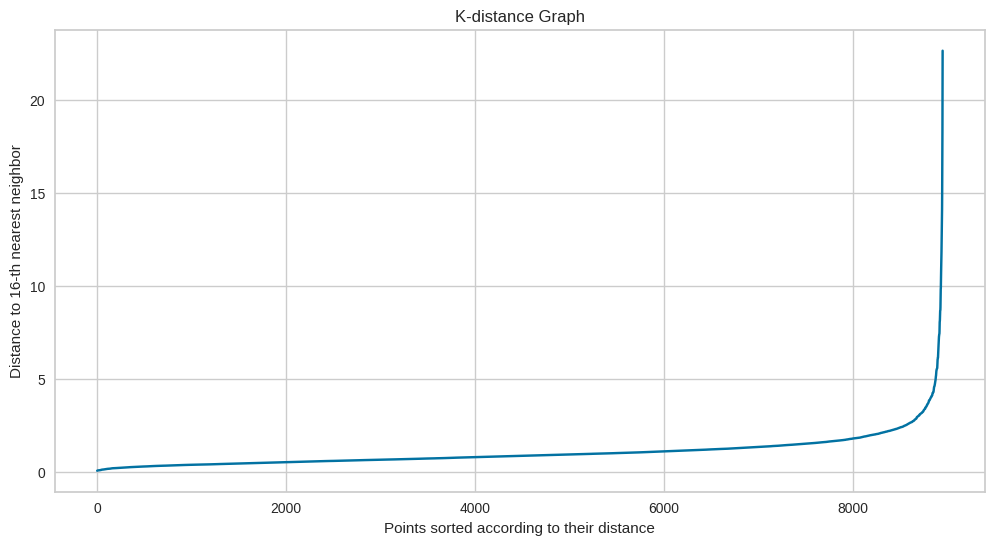

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(sorted_distances)
plt.title("K-distance Graph")
plt.xlabel("Points sorted according to their distance")
plt.ylabel(f"Distance to {min_samples}-th nearest neighbor")
plt.show()

From the plot, elbow appears around 2, so I set eps to be 2. And setting the min_samples to be twice the size of dimentions, which is 16.

In [39]:
# Write your code here
dbscan = DBSCAN(eps=2, min_samples=16)
dbscan.fit(X_pca)
dbscan_silhouette = silhouette_score(X_pca, dbscan.labels_)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

DBSCAN Silhouette Score: 0.5641101562478884


Refer to the report for the analysis of these results.